In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random as rn
from matplotlib.patches import ConnectionPatch
import plotly as py

from scipy import stats
import regex as re


seed = 42

import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

In [2]:
pd.set_option("display.max_columns",21)
tele=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
tele.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
tele["MultipleLines"]=tele["MultipleLines"].replace("No phone service","No")
tele[["MultipleLines","PhoneService"]]

,MultipleLines,PhoneService
0,No,No
1,No,Yes
2,No,Yes
3,No,No
4,No,Yes
...,...,...
7038,Yes,Yes
7039,Yes,Yes
7040,No,No
7041,Yes,Yes


In [4]:
tele["MultipleLines"].value_counts()

No     4072
Yes    2971
Name: MultipleLines, dtype: int64

In [5]:
tele.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
tele2=tele.copy()
tele2["SeniorCitizen"]=tele2["SeniorCitizen"].replace({
    0:"Yes",
    1:"No"
})
tele2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,Yes,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,Yes,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,Yes,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,Yes,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
#Tenure: Number of months the customer has stayed with the company
#Let's create a new column that reresents the number of years

In [8]:
def years_worked(x):
    if x >=12:
        return str(round((x/12),1)) +" "+"years"
    elif x<12:
        return "less than a year"
tele2["years worked"]=tele2["tenure"].apply(years_worked)
tele2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,years worked
0,7590-VHVEG,Female,Yes,Yes,No,1,No,No,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,less than a year
1,5575-GNVDE,Male,Yes,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,2.8 years
2,3668-QPYBK,Male,Yes,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,less than a year
3,7795-CFOCW,Male,Yes,No,No,45,No,No,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3.8 years
4,9237-HQITU,Female,Yes,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,less than a year


In [9]:
tele2[["tenure","years worked"]].head()

,tenure,years worked
0,1,less than a year
1,34,2.8 years
2,2,less than a year
3,45,3.8 years
4,2,less than a year


In [10]:
pd.set_option("display.max_columns",22)
tele2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,years worked
0,7590-VHVEG,Female,Yes,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,less than a year
1,5575-GNVDE,Male,Yes,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,2.8 years
2,3668-QPYBK,Male,Yes,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,less than a year
3,7795-CFOCW,Male,Yes,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3.8 years
4,9237-HQITU,Female,Yes,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,less than a year


In [11]:
tele2["gender"].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [12]:
#tele2[tele2["TotalCharges"]==" "]
tele2["TotalCharges"]=tele2["TotalCharges"].replace(" ",np.nan)
tele2.dropna(subset=["TotalCharges"])
tele2["TotalCharges"]=tele2["TotalCharges"].apply(lambda x: float(x))
tele2["TotalCharges"].value_counts()

20.20      11
19.75       9
20.05       8
19.90       8
19.65       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: TotalCharges, Length: 6530, dtype: int64

In [13]:
pd.set_option("display.max_columns",21)
tele=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
tele.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


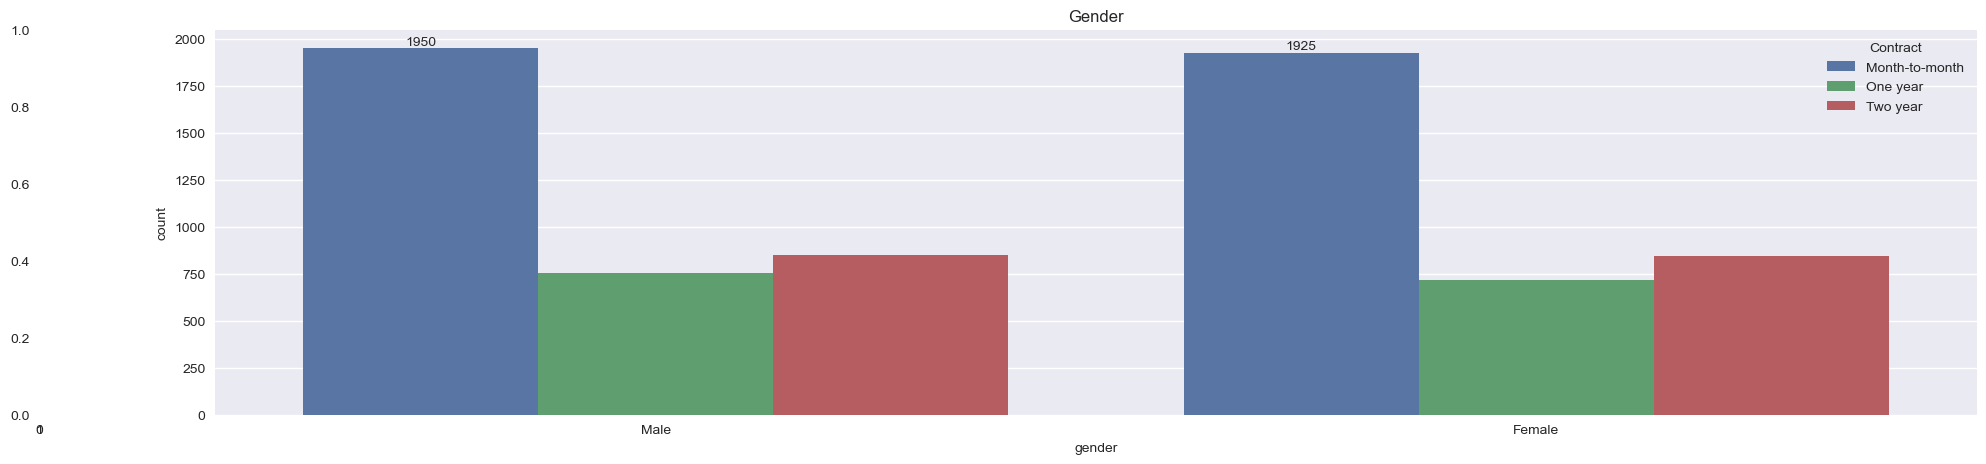

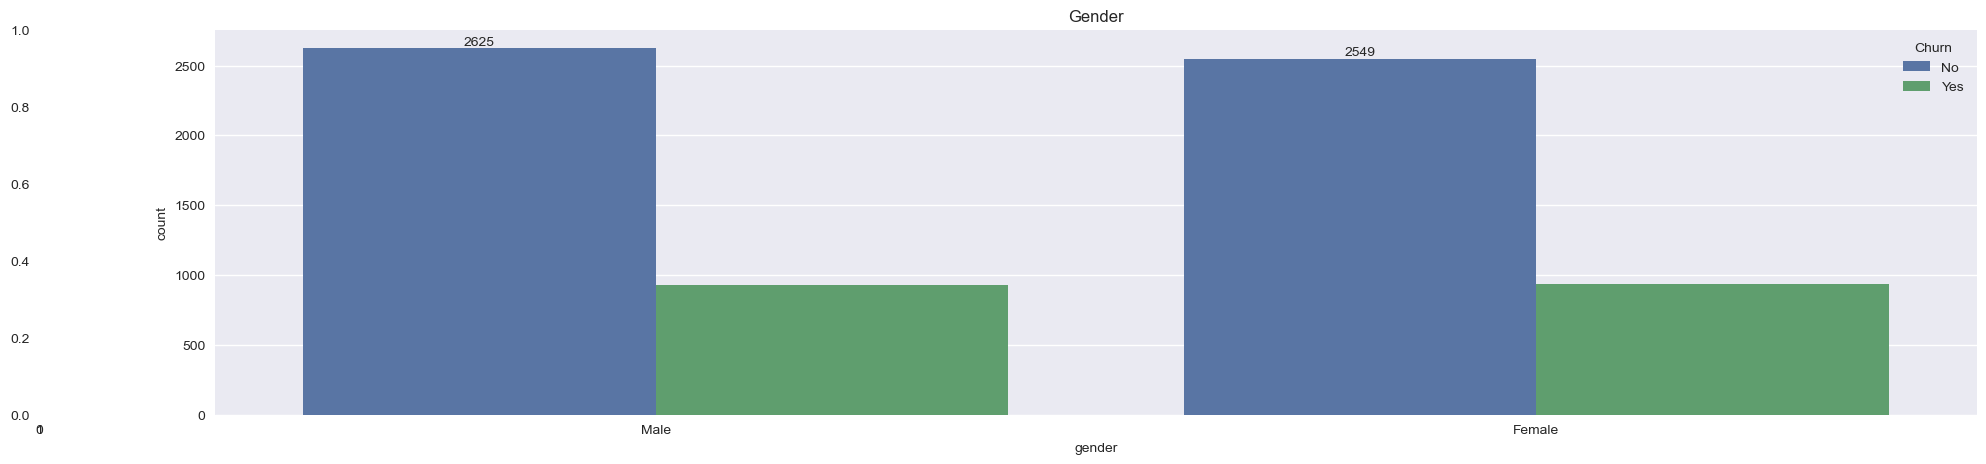

In [14]:
cols=["Contract","Churn"]
for col in cols:
    plt.style.use('seaborn')
    #sns.color_palette("blend:#7AB,#EDA", as_cmap=True)
    fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [0, 10]}, figsize=(25, 5))
    ax = sns.countplot(x = "gender", data = tele2, order =  tele2["gender"].value_counts().sort_values(ascending=False).index[0:],hue=col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
    ax.bar_label(ax.containers[0])
    plt.title(f'Gender')
    plt.show()
    





<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

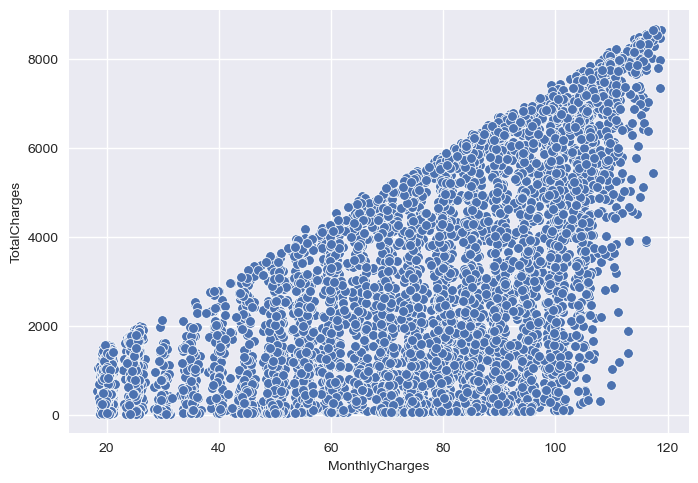

In [15]:

sns.scatterplot(x="MonthlyCharges",y="TotalCharges",data=tele2)



<Axes: xlabel='tenure', ylabel='TotalCharges'>

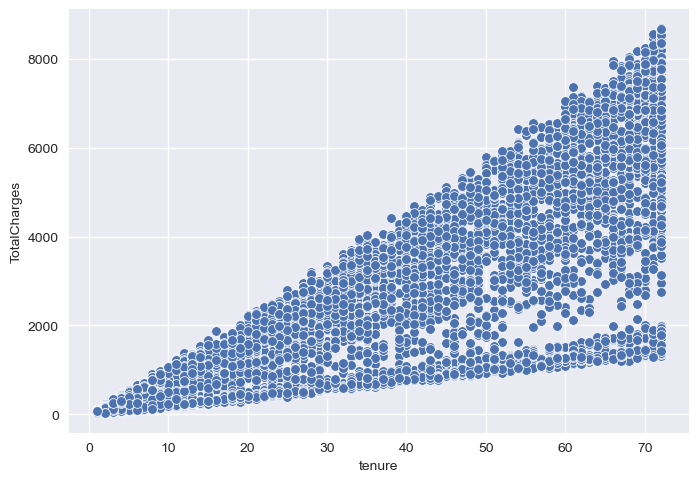

In [16]:
sns.scatterplot(x="tenure",y="TotalCharges",data=tele2)

<Axes: xlabel='MonthlyCharges', ylabel='tenure'>

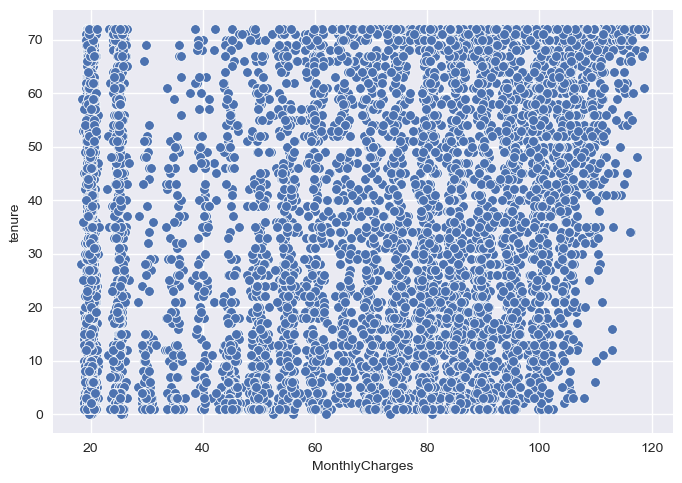

In [17]:
sns.scatterplot(x="MonthlyCharges",y="tenure",data=tele2)

Gender does not heavily affect churn

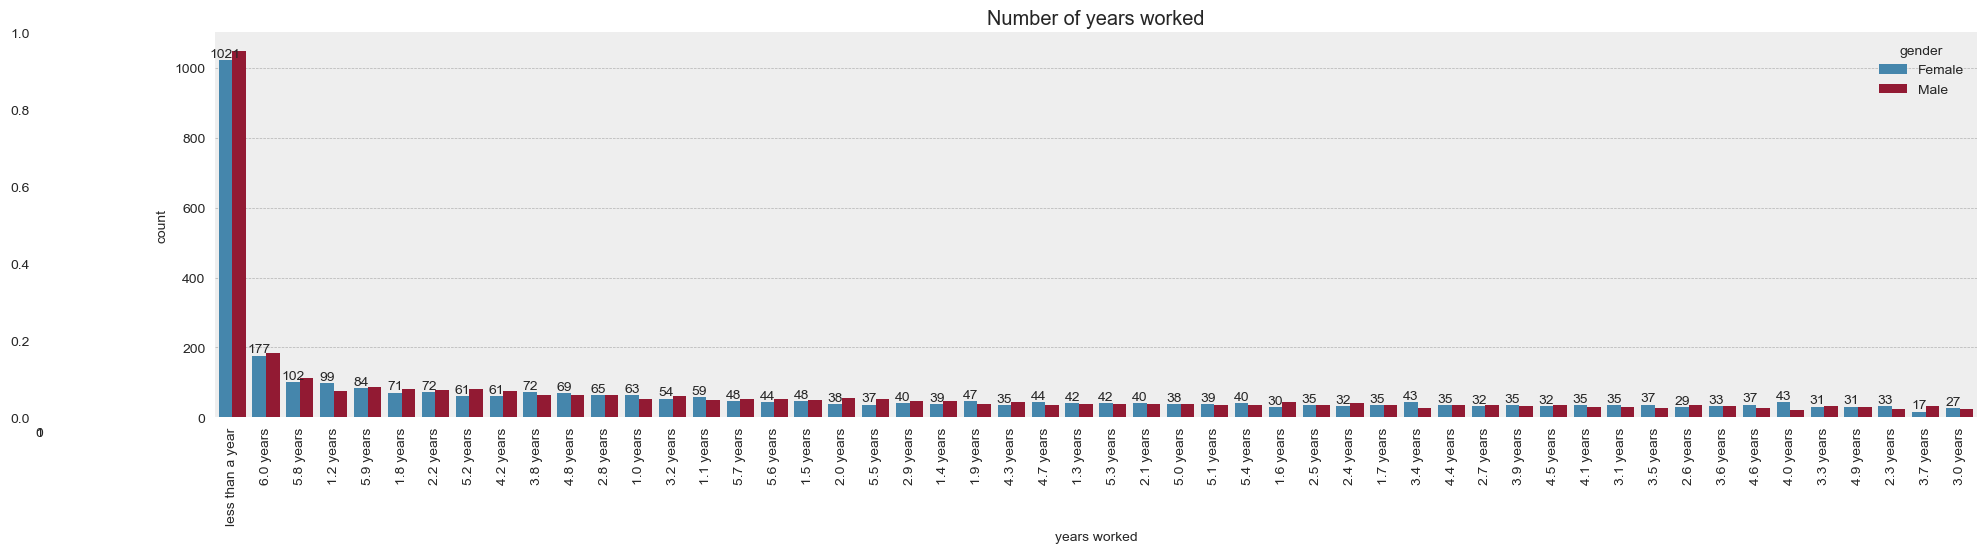

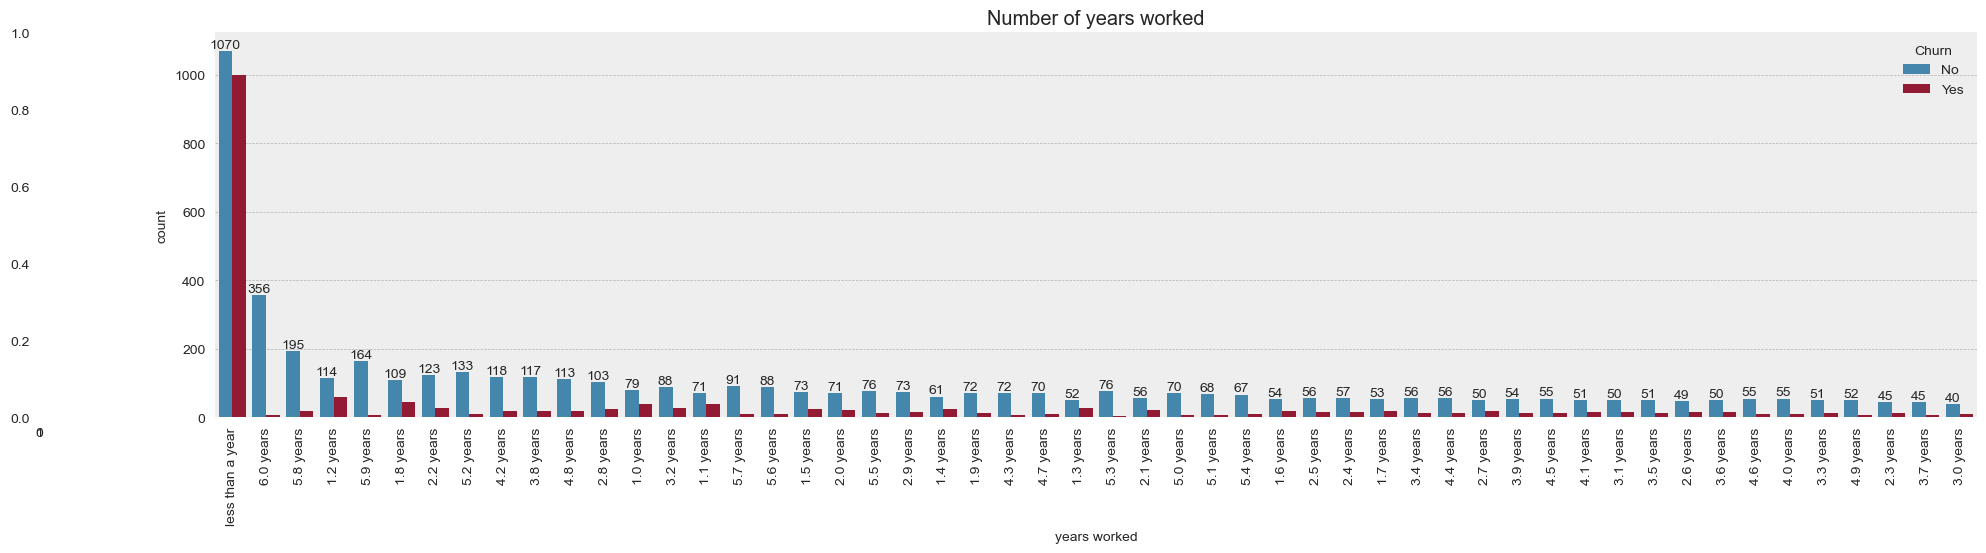

In [18]:
cols=["gender","Churn"]
for col in cols:
    plt.style.use('bmh')
    #sns.color_palette("blend:#7AB,#EDA", as_cmap=True)
    fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [0, 10]}, figsize=(25, 5))
    ax = sns.countplot(x = "years worked", data = tele2, order =  tele2["years worked"].value_counts().sort_values(ascending=False).index[0:],hue=col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    ax.bar_label(ax.containers[0])
    plt.title(f'Number of years worked')
    plt.show()
    





People who churn the most are usually newbies who work less than a year 

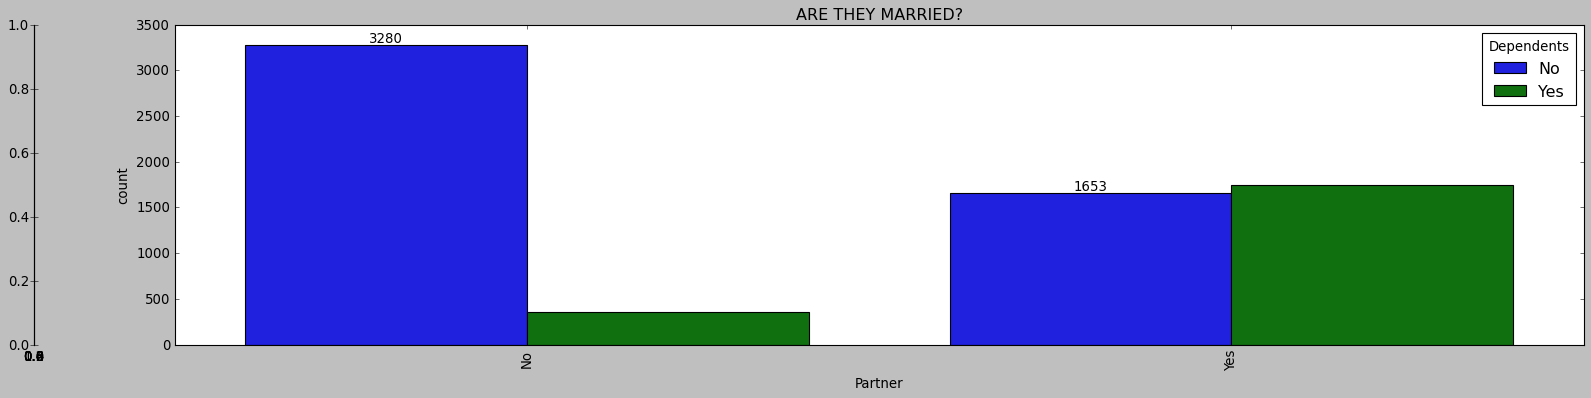

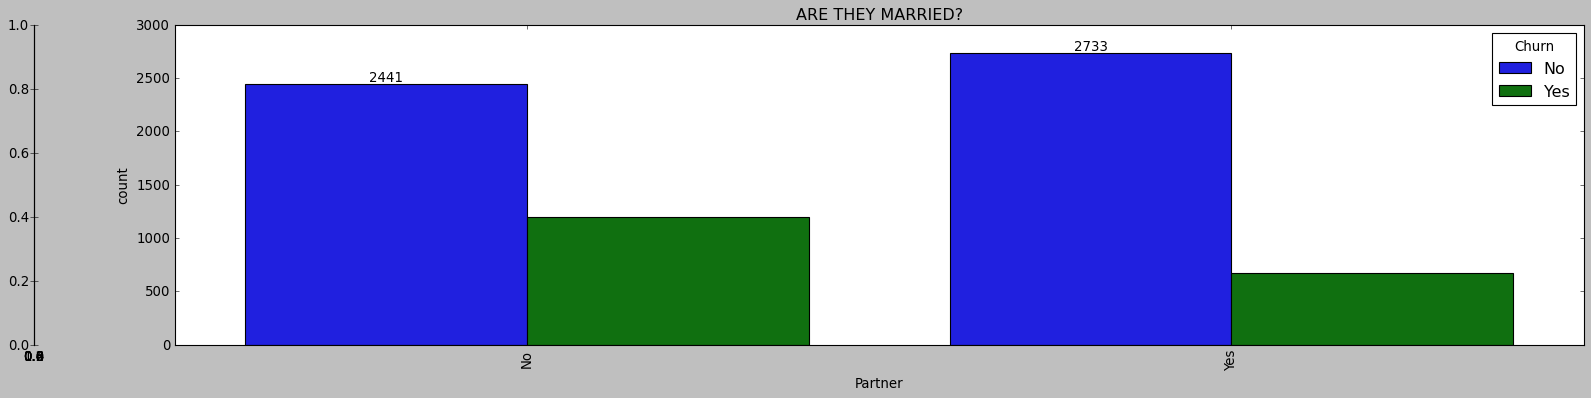

In [19]:
cols=["Dependents","Churn"]
for col in cols:
    plt.style.use('classic')
    #sns.color_palette("blend:#7AB,#EDA", as_cmap=True)
    fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [0, 10]}, figsize=(25, 5))
    ax = sns.countplot(x = "Partner", data = tele2, order =  tele2["Partner"].value_counts().sort_values(ascending=False).index[0:],hue=col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    ax.bar_label(ax.containers[0])
    plt.title(f'ARE THEY MARRIED?')
    plt.show()
    





THOSE WHO ARE MARRIED , CHURN ALOT AS COMPARED TO THOSE WHO ARE NOTMARRIED 

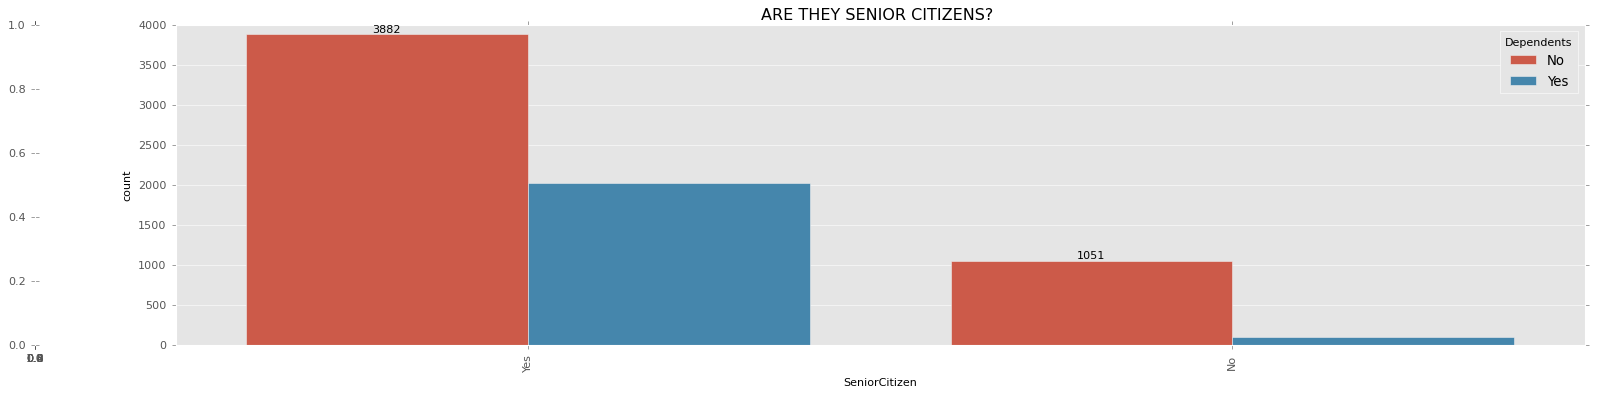

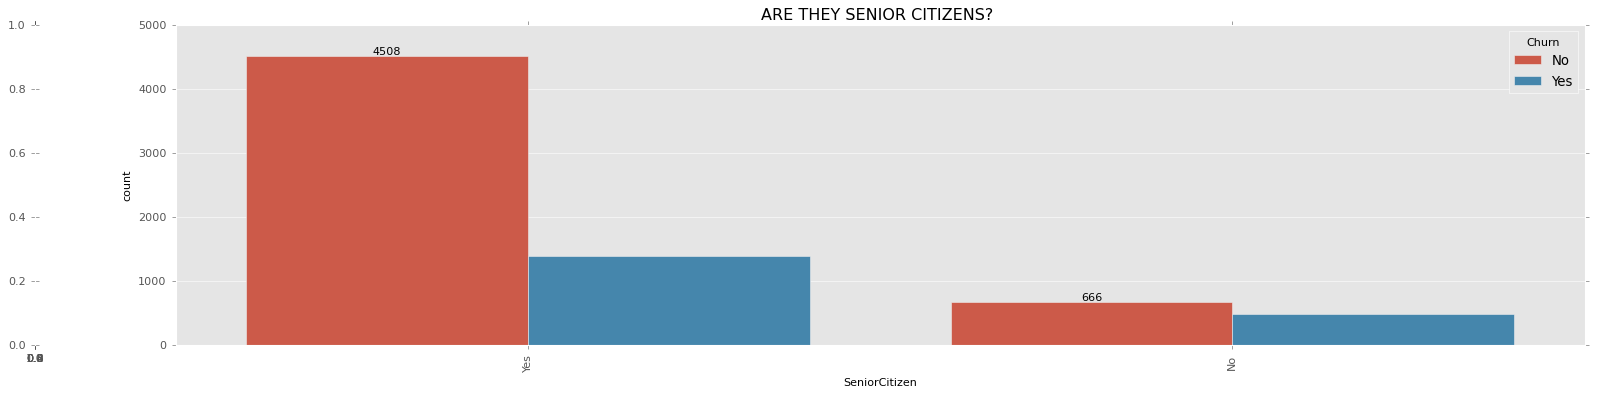

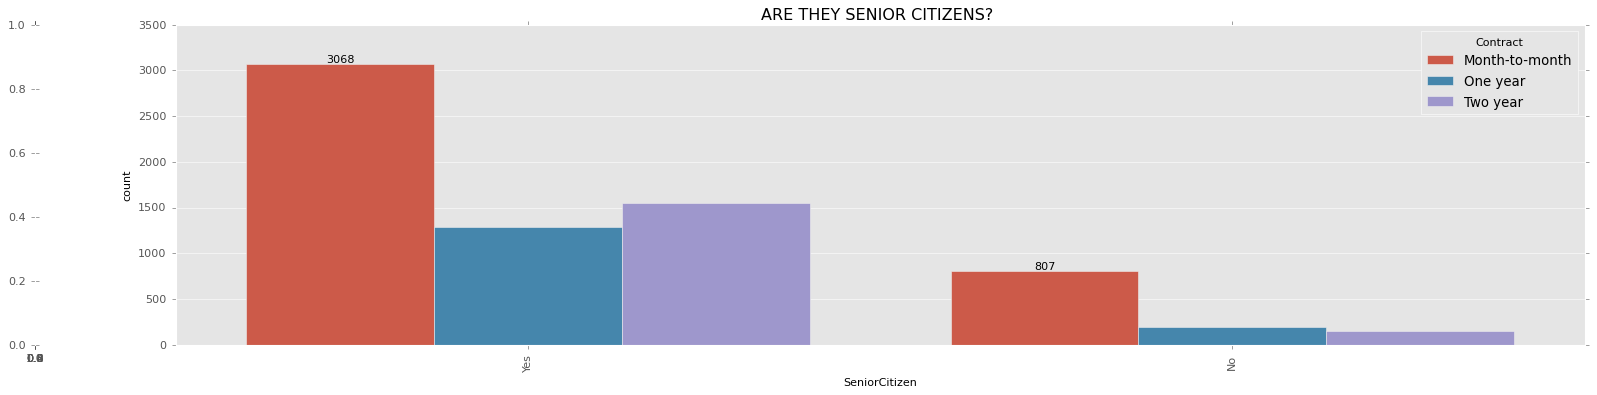

In [20]:
cols=["Dependents","Churn","Contract"]
for col in cols:
    plt.style.use('ggplot')
    #sns.color_palette("blend:#7AB,#EDA", as_cmap=True)
    fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [0, 10]}, figsize=(25, 5))
    ax = sns.countplot(x = "SeniorCitizen", data = tele2, order =  tele2["SeniorCitizen"].value_counts().sort_values(ascending=False).index[0:],hue=col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    ax.bar_label(ax.containers[0])
    plt.title(f'ARE THEY SENIOR CITIZENS? ')
    plt.show()
    





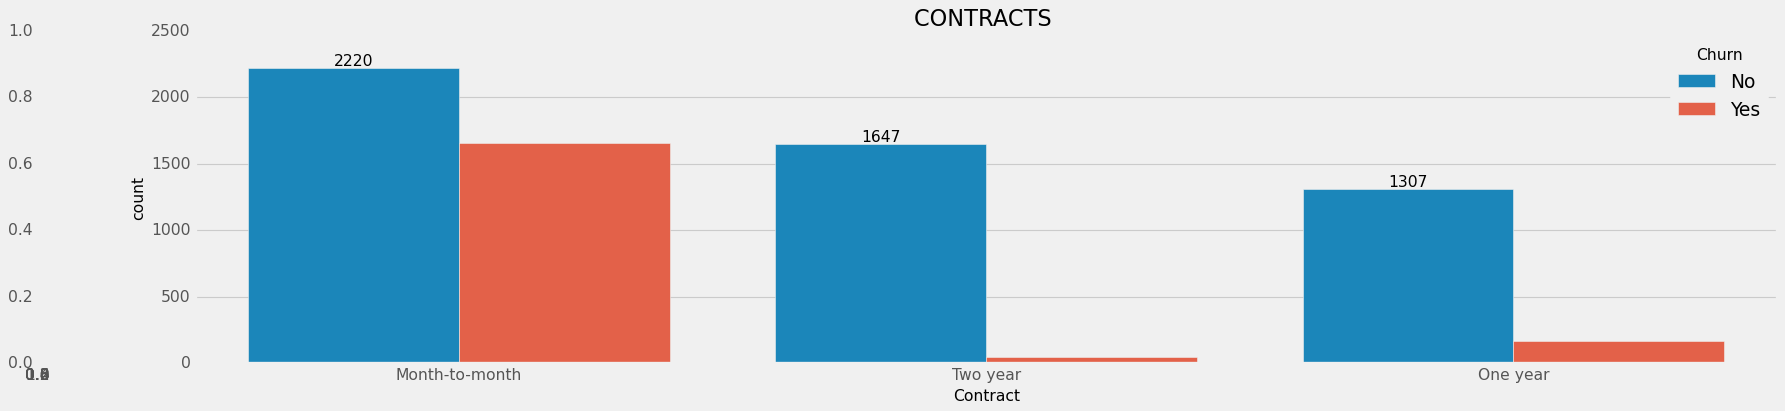

In [21]:
cols=["Churn"]
for col in cols:
    plt.style.use('fivethirtyeight')
    #sns.color_palette("blend:#7AB,#EDA", as_cmap=True)
    fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [0, 10]}, figsize=(25, 5))
    ax = sns.countplot(x = "Contract", data = tele2, order =  tele2["Contract"].value_counts().sort_values(ascending=False).index[0:],hue=col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
    ax.bar_label(ax.containers[0])
    plt.title(f'CONTRACTS ')
    plt.show()
    





People with month-to-month contracts churn the most

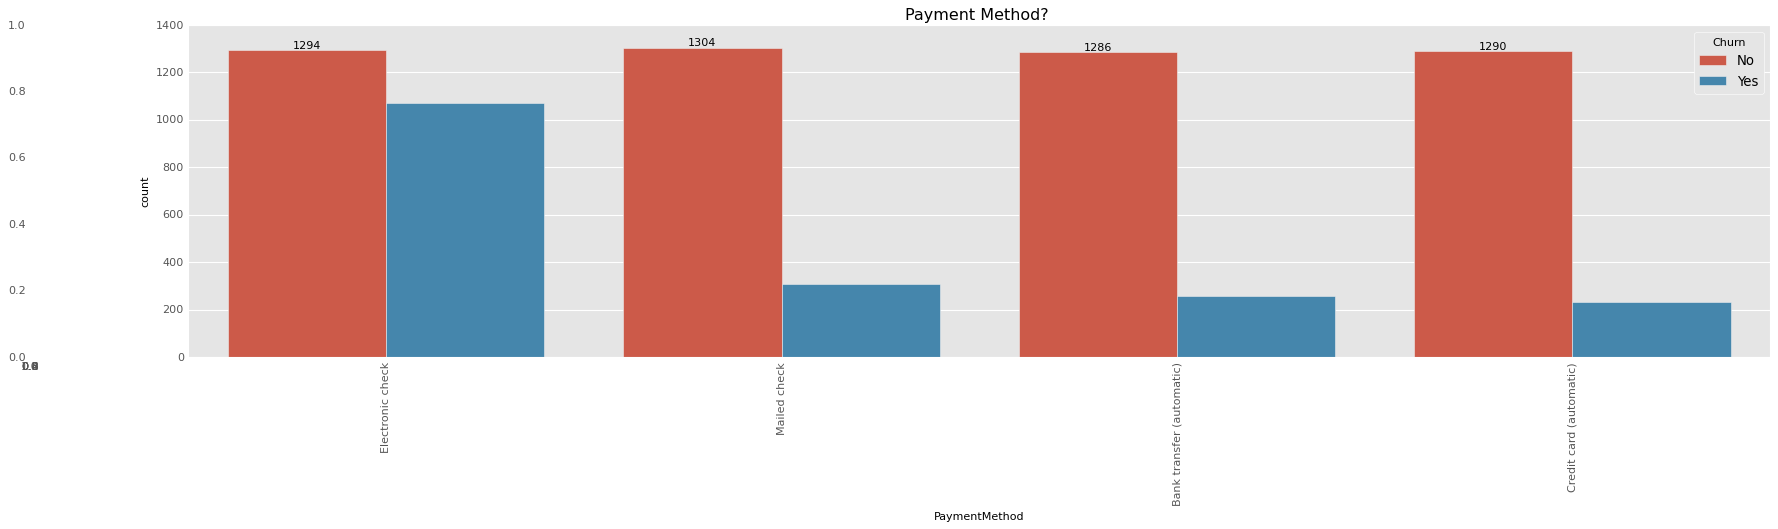

In [22]:
cols=["Churn"]
for col in cols:
    plt.style.use('ggplot')
    #sns.color_palette("blend:#7AB,#EDA", as_cmap=True)
    fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [0, 10]}, figsize=(25, 5))
    ax = sns.countplot(x = "PaymentMethod", data = tele2, order =  tele2["PaymentMethod"].value_counts().sort_values(ascending=False).index[0:],hue=col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    ax.bar_label(ax.containers[0])
    plt.title(f'Payment Method? ')
    plt.show()
    





People who pay via electronic check churn the most

<Axes: xlabel='PaymentMethod', ylabel='TotalCharges'>

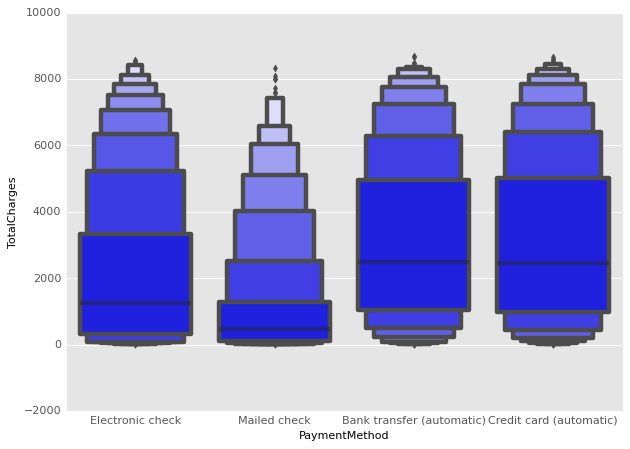

In [23]:
import seaborn as sns
#sns.set_theme(style="whitegrid")
#plt.style.use('dark_background')
clarity_ranking=['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)']

sns.boxenplot(x="PaymentMethod", y="TotalCharges",
              color="b", order=clarity_ranking,
              scale="linear", data=tele2)

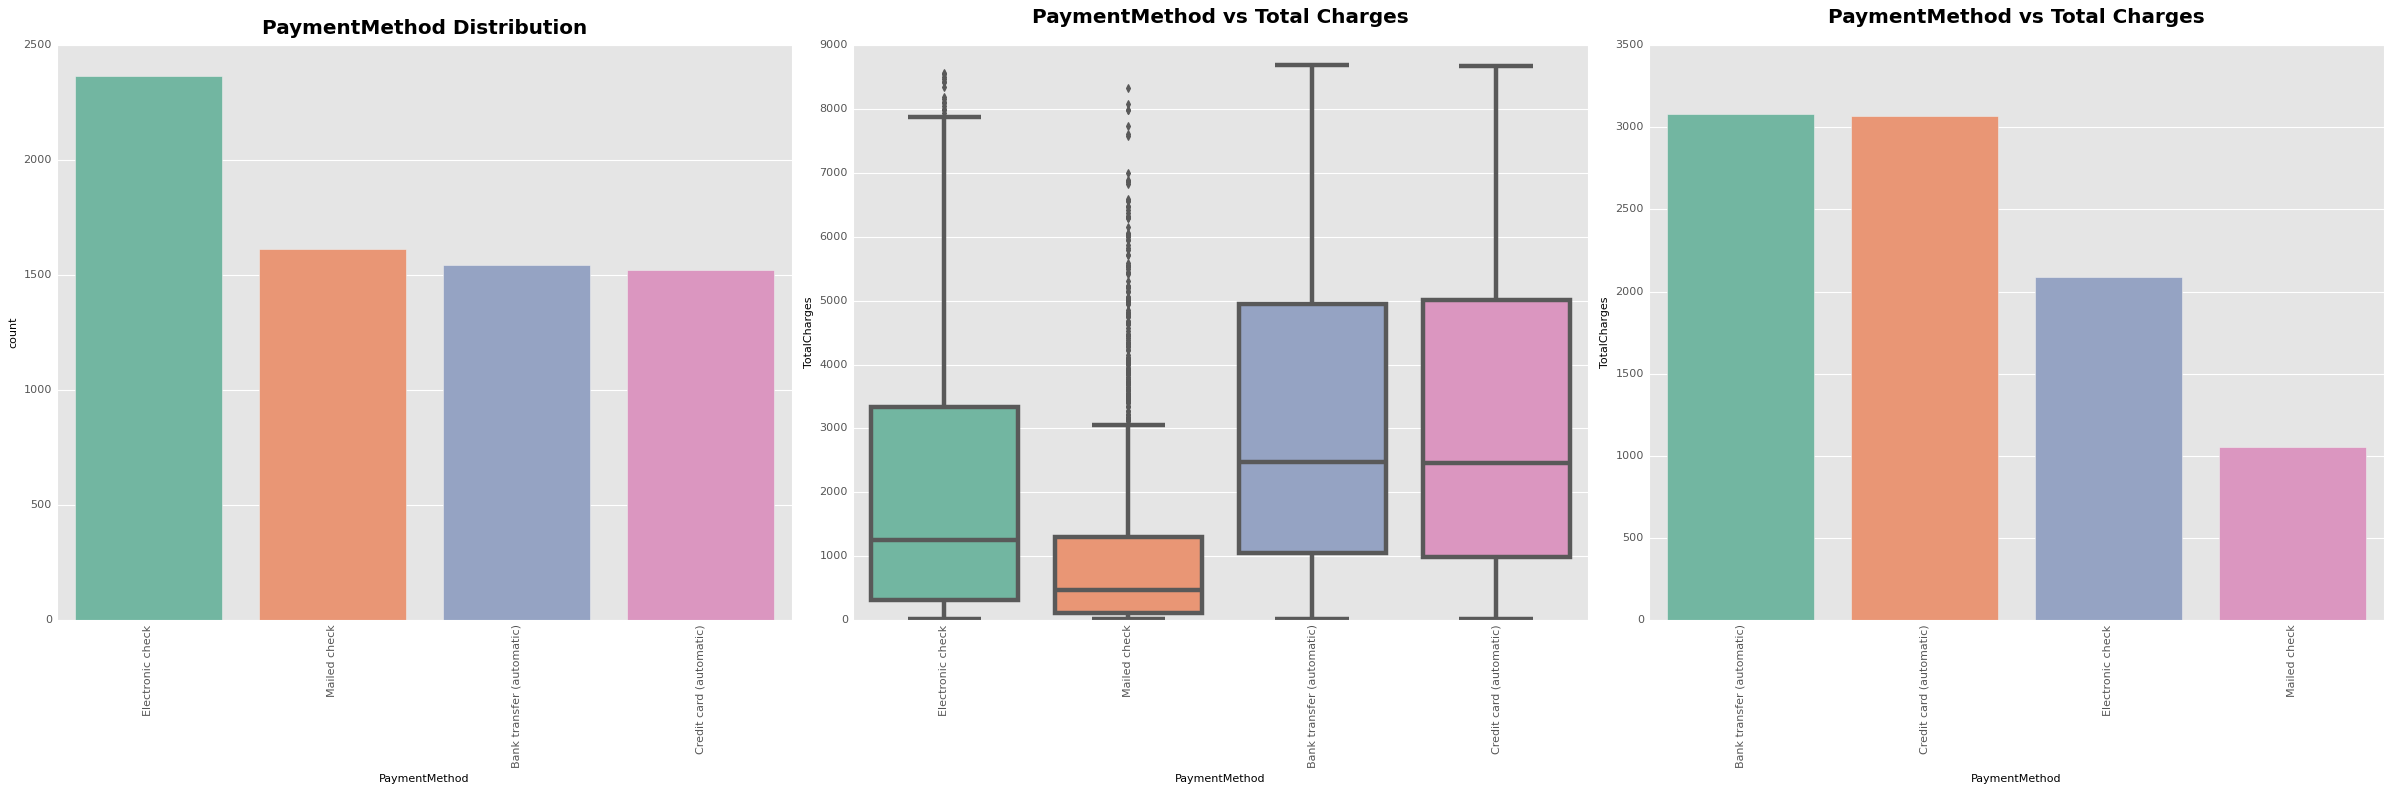

In [24]:
def categorical_visualization(cols):
    
    plt.figure(figsize=(30,10))
    plt.subplot(1,3,1)
    sns.countplot(x=cols,data=tele2,palette="Set2",order=tele2[cols].value_counts().index)
    plt.title(f"{cols} Distribution",pad=10,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)

    plt.subplot(1,3,2)
    sns.boxplot(x=cols,y="TotalCharges",data=tele2,palette="Set2")
    plt.title(f"{cols} vs Total Charges",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    
    plt.subplot(1,3,3)
    x=pd.DataFrame(tele2.groupby(cols)["TotalCharges"].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="TotalCharges",data=x,palette="Set2")
    plt.title(f"{cols} vs Total Charges",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

categorical_visualization("PaymentMethod")

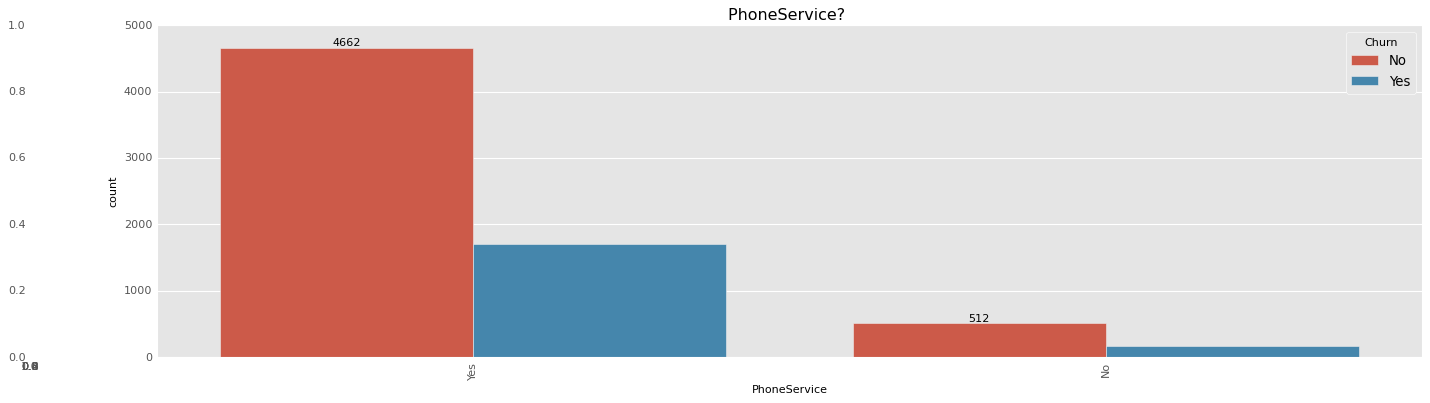

In [25]:
cols=["Churn"]
for col in cols:
    plt.style.use('ggplot')
    #sns.color_palette("blend:#7AB,#EDA", as_cmap=True)
    fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [0, 10]}, figsize=(20, 5))
    ax = sns.countplot(x = "PhoneService", data = tele2, order =  tele2["PhoneService"].value_counts().sort_values(ascending=False).index[0:],hue=col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    ax.bar_label(ax.containers[0])
    plt.title(f'PhoneService? ')
    plt.show()
    





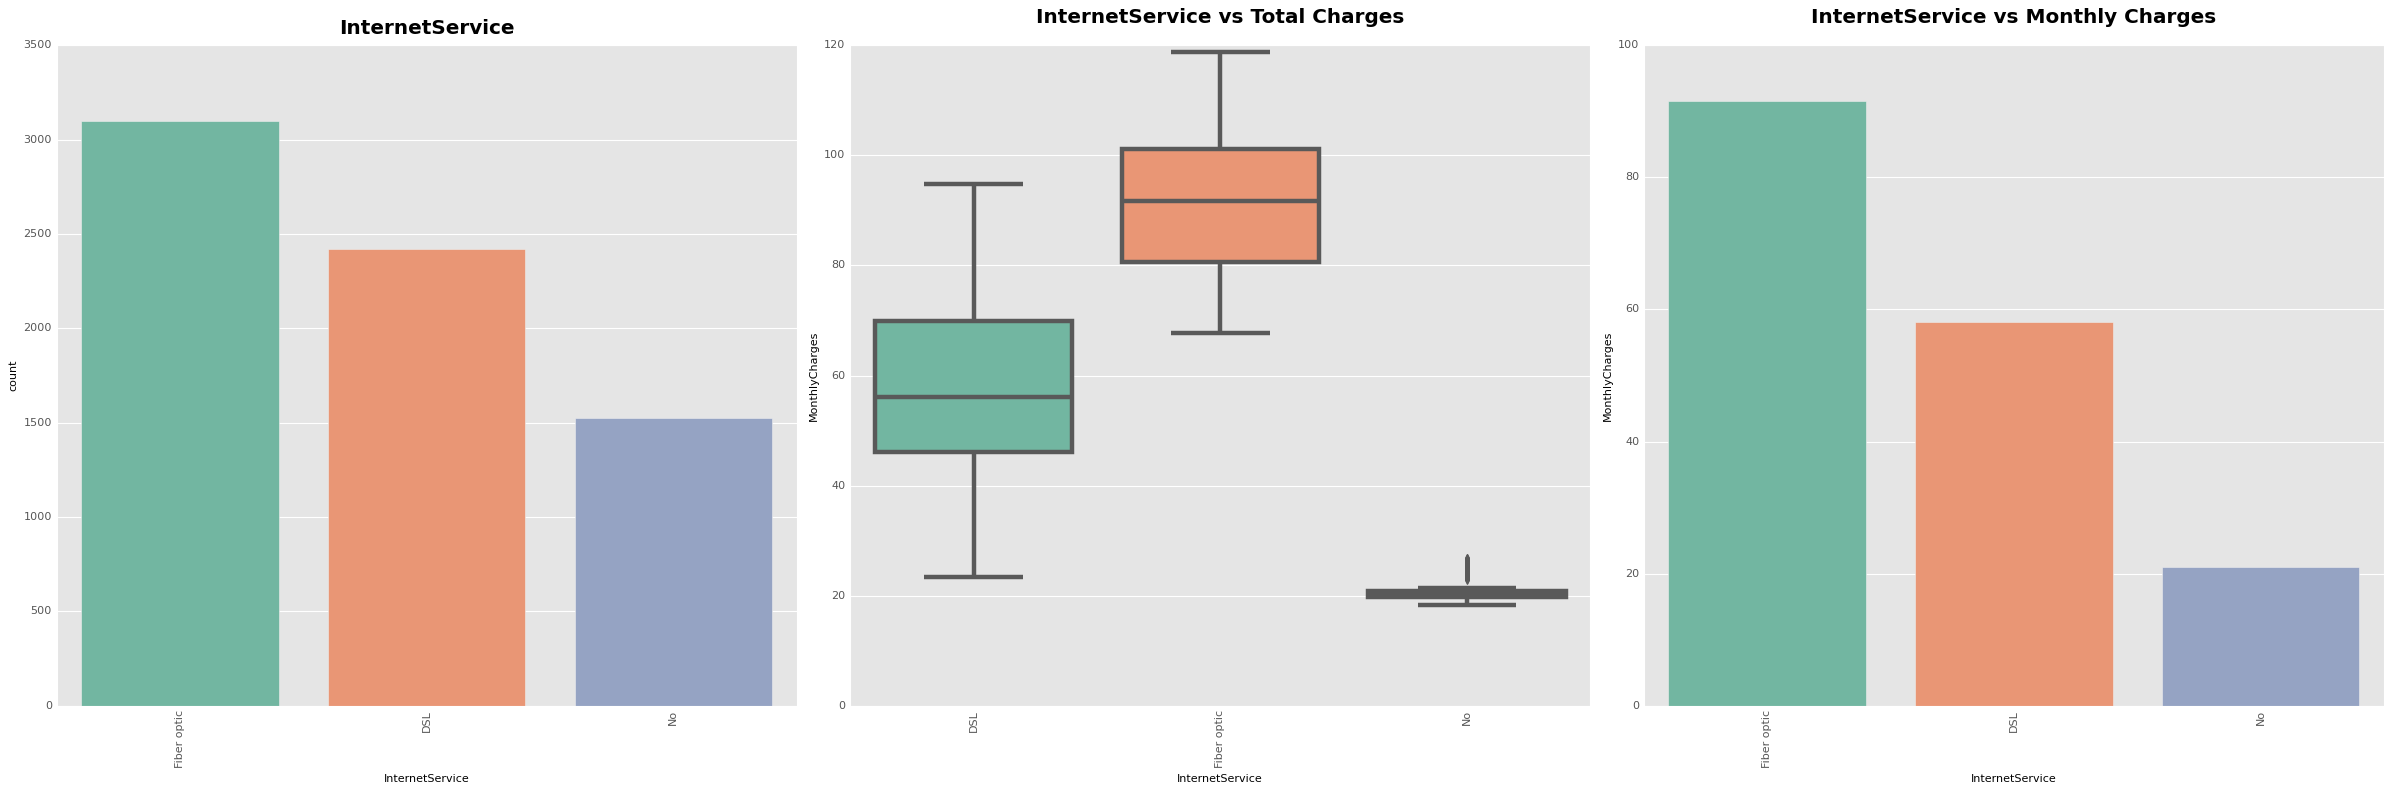

In [26]:
def categorical_visualization(cols):
    
    plt.figure(figsize=(30,10))
    plt.subplot(1,3,1)
    sns.countplot(x=cols,data=tele2,palette="Set2",order=tele2[cols].value_counts().index)
    plt.title(f"{cols}",pad=10,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)

    plt.subplot(1,3,2)
    sns.boxplot(x=cols,y="MonthlyCharges",data=tele2,palette="Set2")
    plt.title(f"{cols} vs Total Charges",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    
    plt.subplot(1,3,3)
    x=pd.DataFrame(tele2.groupby(cols)["MonthlyCharges"].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="MonthlyCharges",data=x,palette="Set2")
    plt.title(f"{cols} vs Monthly Charges",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

categorical_visualization("InternetService")

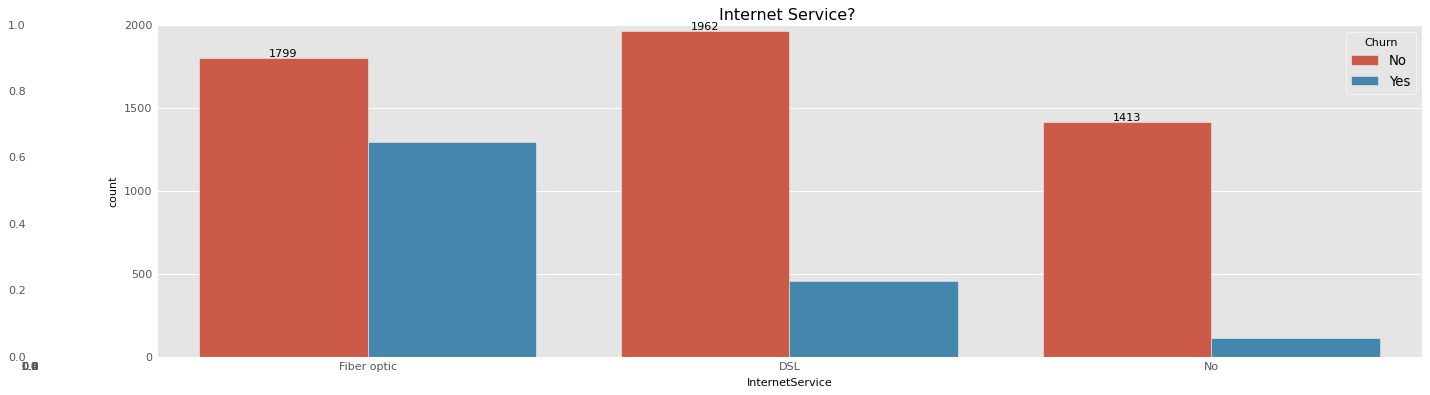

In [27]:
cols=["Churn"]
for col in cols:
    plt.style.use('ggplot')
    #sns.color_palette("blend:#7AB,#EDA", as_cmap=True)
    fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [0, 10]}, figsize=(20, 5))
    ax = sns.countplot(x = "InternetService", data = tele2, order =  tele2["InternetService"].value_counts().sort_values(ascending=False).index[0:],hue=col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
    ax.bar_label(ax.containers[0])
    plt.title(f'Internet Service? ')
    plt.show()
    





People who use Fibre optic churn the most

In [28]:
def num_plot(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex = True, figsize = (8,5),gridspec_kw = {"height_ratios": (.2, .8)})
    ax[0].set_title(title)
    sns.boxplot(x = col, data = df, ax = ax[0])
    ax[0].set(yticks = [])
    sns.histplot(x = col, data = df, ax = ax[1])
    ax[1].set_xlabel(col)
    plt.axvline(df[col].mean(), color = 'g', label = 'mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color = 'red', label = 'median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color = 'purple', label = 'mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor = (1, 1.03), ncol = 1, fancybox = True, shadow = True, frameon = True)
    plt.tight_layout()
    plt.show()

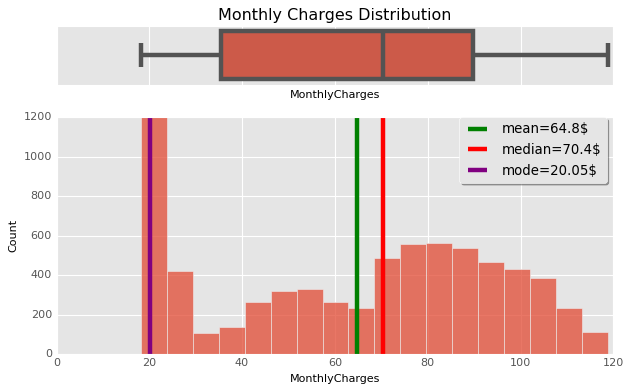

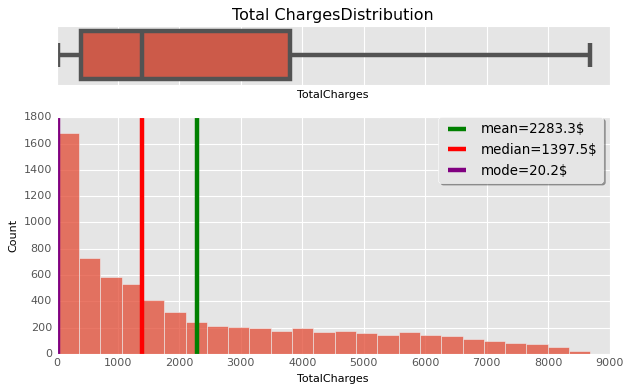

In [29]:
num_plot(tele2, 'MonthlyCharges', 'Monthly Charges Distribution','$')
num_plot(tele2, 'TotalCharges', 'Total ChargesDistribution','$')

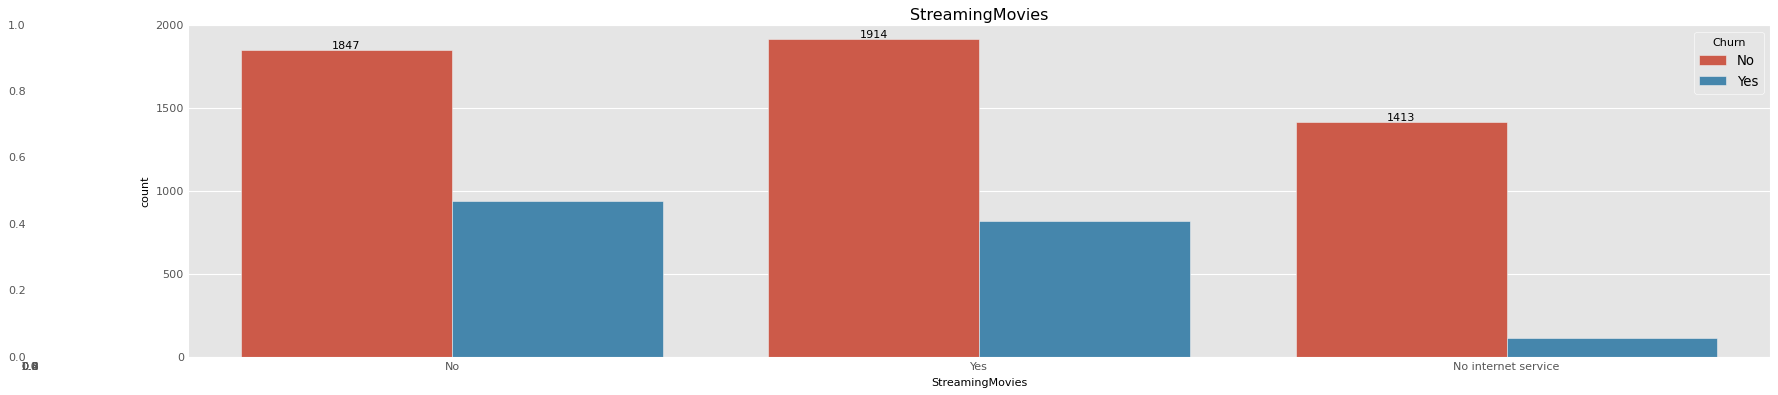

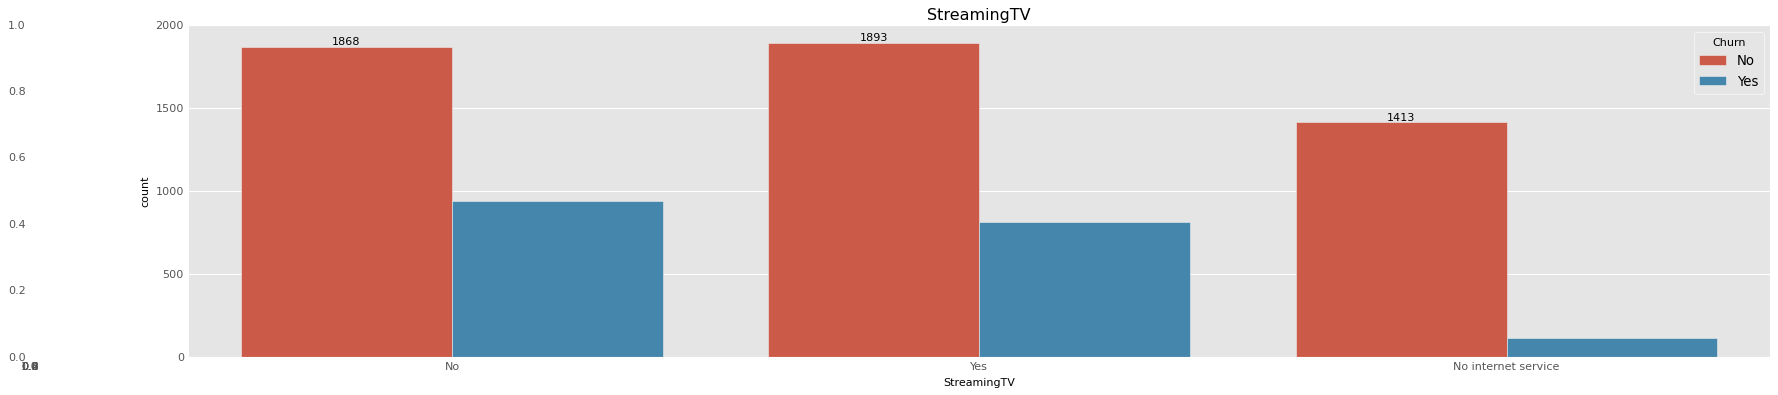

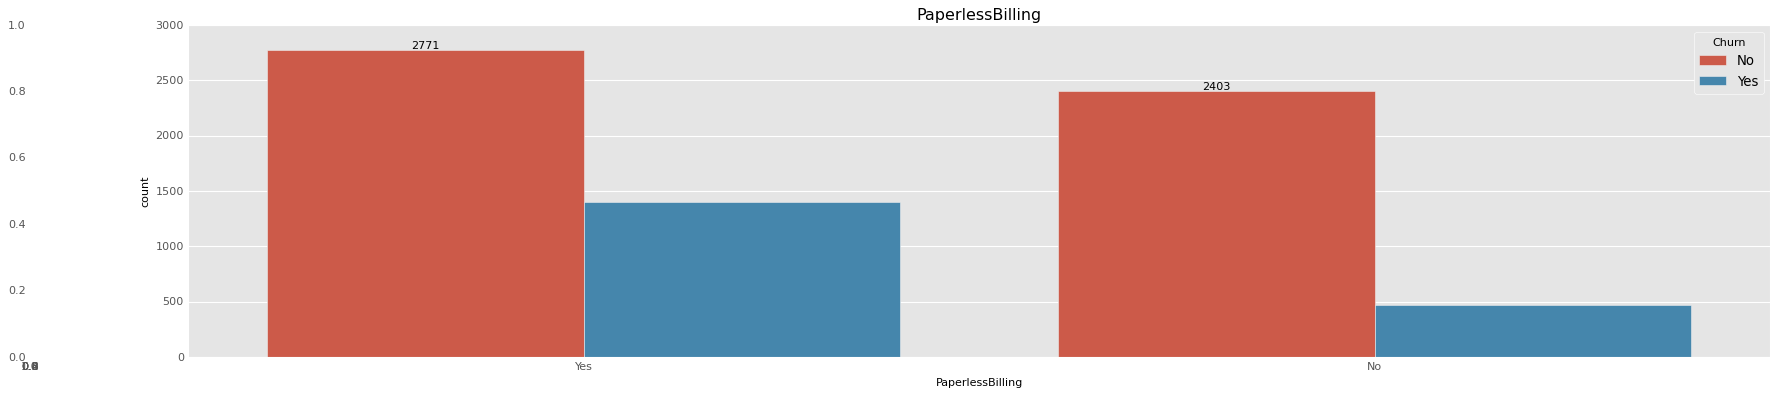

In [32]:
cols=["StreamingMovies","StreamingTV","PaperlessBilling"]
for col in cols:
    plt.style.use('ggplot')
    #sns.color_palette("blend:#7AB,#EDA", as_cmap=True)
    fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [0, 10]}, figsize=(25, 5))
    ax = sns.countplot(x = col, data = tele2, order =  tele2[col].value_counts().sort_values(ascending=False).index[0:],hue=tele["Churn"])
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
    ax.bar_label(ax.containers[0])
    plt.title(f'{col}')
    plt.show()
    





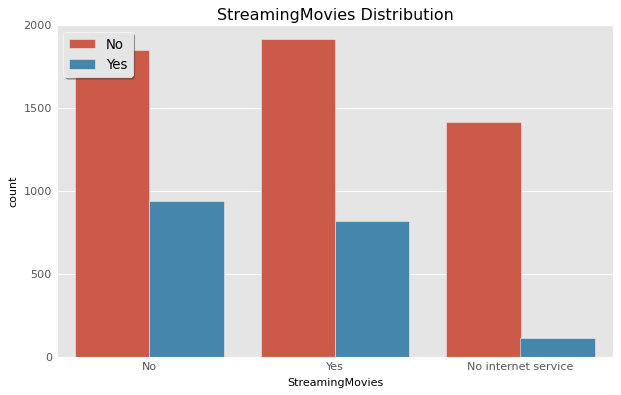

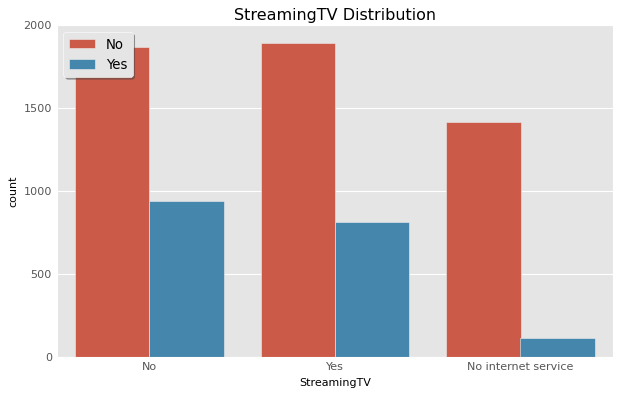

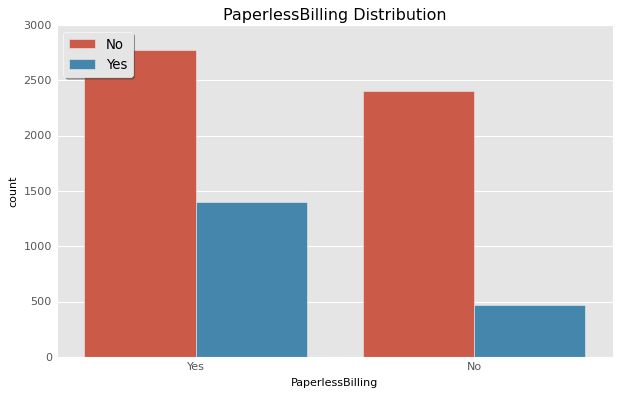

In [33]:
cols=["StreamingMovies","StreamingTV","PaperlessBilling"]
for col in cols:
    #plt.style.use('dark_background')
    fig, ax  = plt.subplots(figsize=(8,5))
    ax = sns.countplot(x = col, data = tele2, hue = tele2["Churn"])
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 00)
    ax.set_xlabel(f'{col}')
    plt.title(f'{col} Distribution')
    plt.legend(loc = 'upper left', ncol = 1, fancybox = True, shadow = True, frameon = True)
    plt.show()

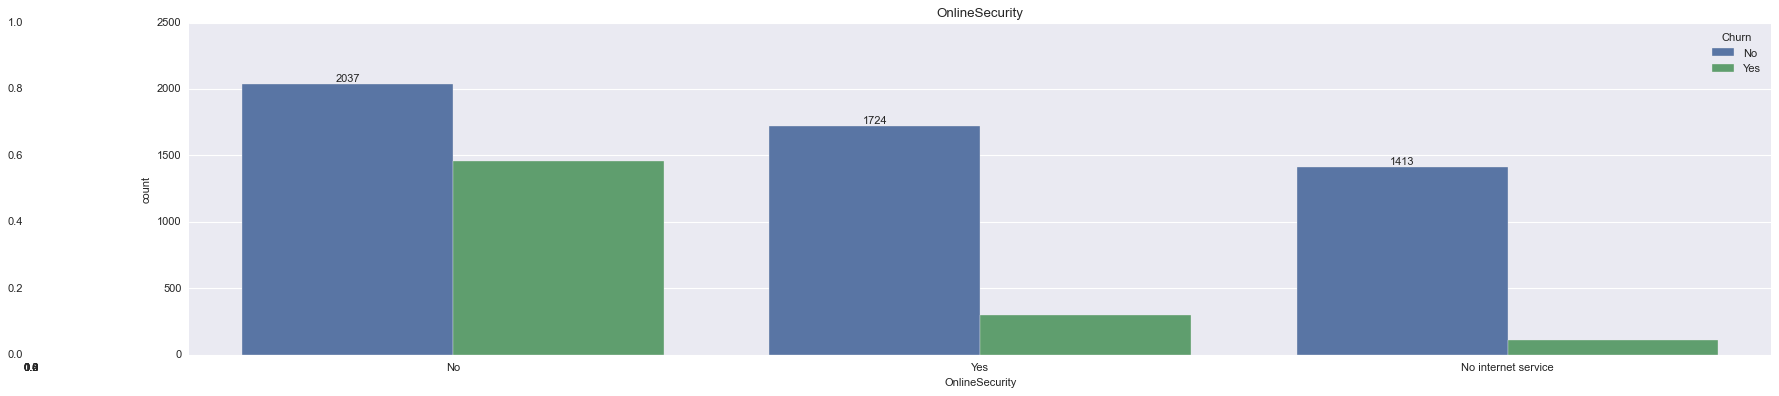

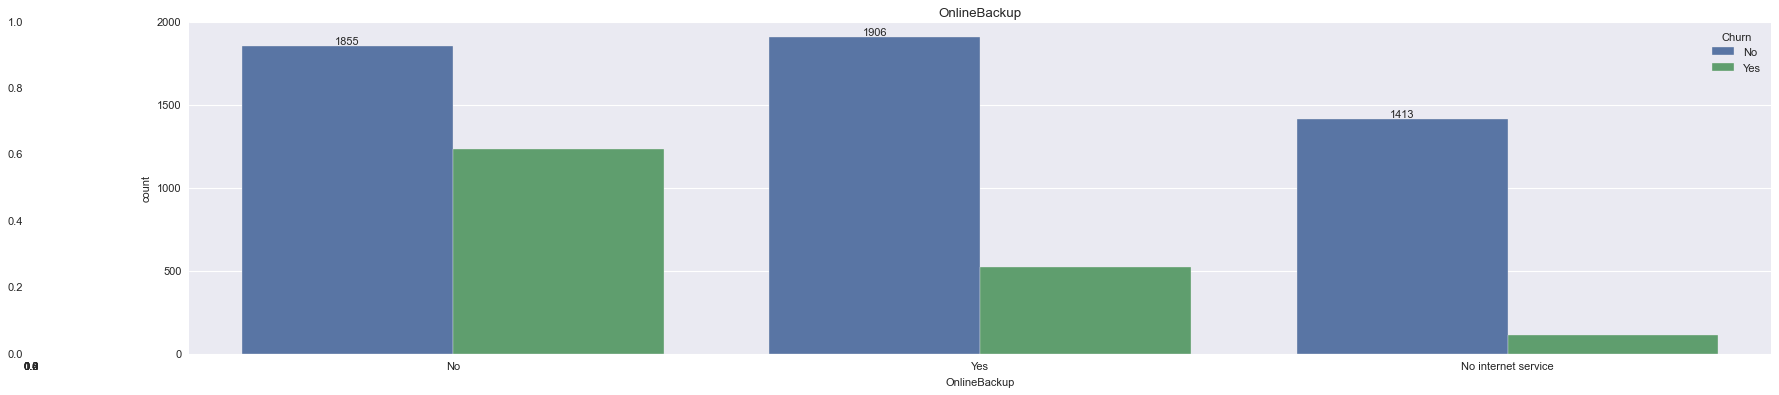

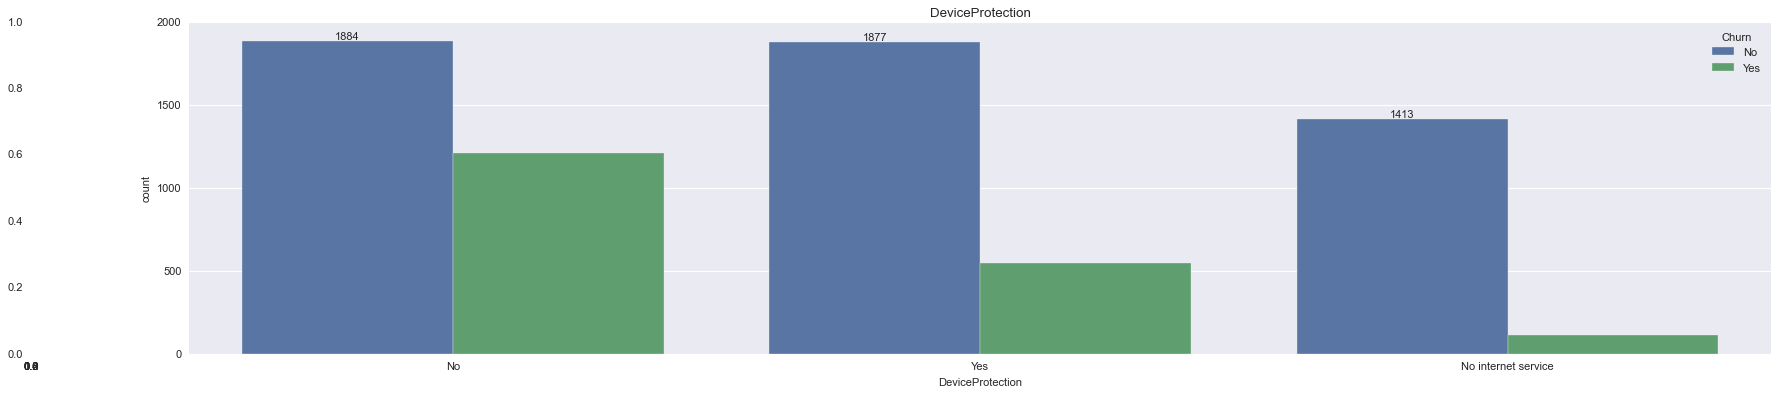

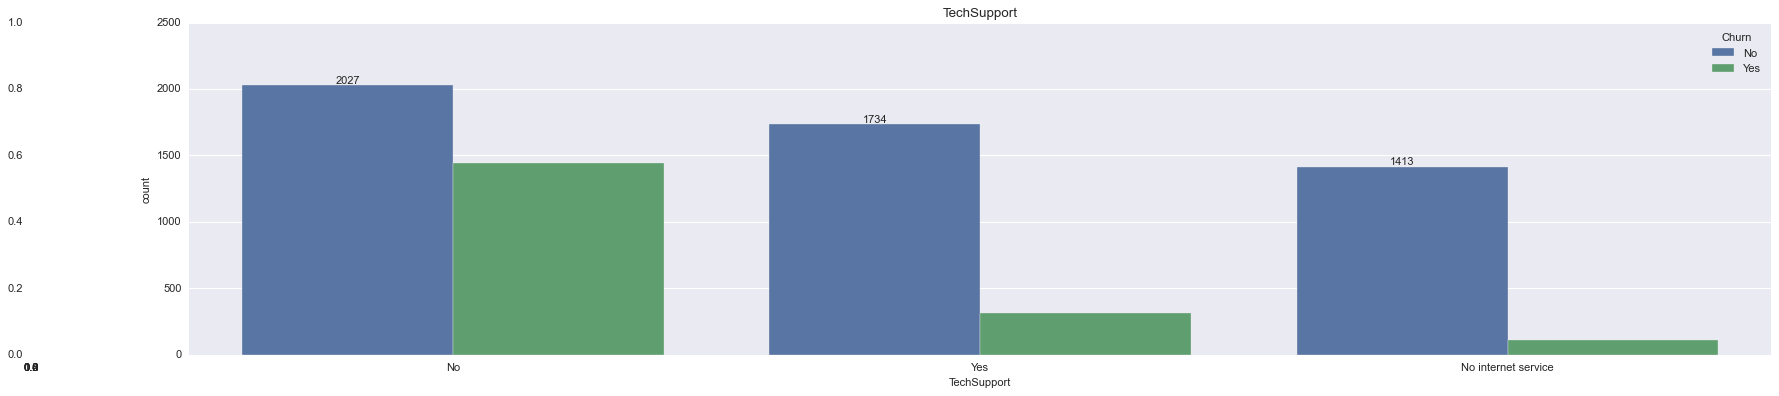

In [34]:
cols=["OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport"]
for col in cols:
    plt.style.use('seaborn')
    #sns.color_palette("blend:#7AB,#EDA", as_cmap=True)
    fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [0, 10]}, figsize=(25, 5))
    ax = sns.countplot(x = col, data = tele2, order =  tele2[col].value_counts().sort_values(ascending=False).index[0:],hue=tele["Churn"])
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
    ax.bar_label(ax.containers[0])
    plt.title(f'{col}')
    plt.show()
    





In [35]:
tele3=tele2.copy()
tele3["Churn"]=tele3["Churn"].replace({
    "Yes":1,
    "No":0
})

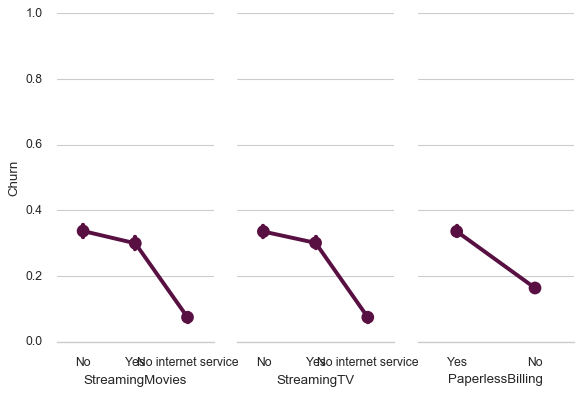

In [36]:
sns.set_theme(style="whitegrid")

# Load the example Titanic dataset
#titanic = sns.load_dataset("titanic")

# Set up a grid to plot survival probability against several variables
g = sns.PairGrid(tele3, y_vars="Churn",
                 x_vars=["StreamingMovies","StreamingTV","PaperlessBilling"],
                 height=5, aspect=.5)

# Draw a seaborn pointplot onto each Axes
g.map(sns.pointplot, scale=1.3, errwidth=4, color="xkcd:plum")
g.set(ylim=(0, 1))
sns.despine(fig=g.fig, left=True)

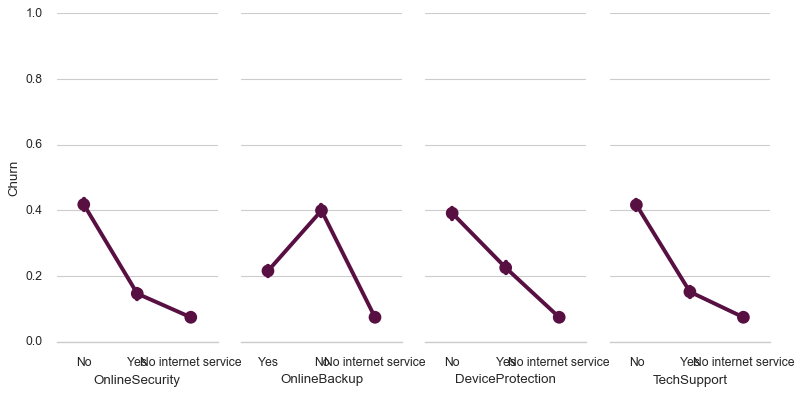

In [37]:
sns.set_theme(style="whitegrid")


g = sns.PairGrid(tele3, y_vars="Churn",
                 x_vars=["OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport"],
                 height=5, aspect=.5)

# Draw a seaborn pointplot onto each Axes
g.map(sns.pointplot, scale=1.3, errwidth=4, color="xkcd:plum")
g.set(ylim=(0, 1))
sns.despine(fig=g.fig, left=True)

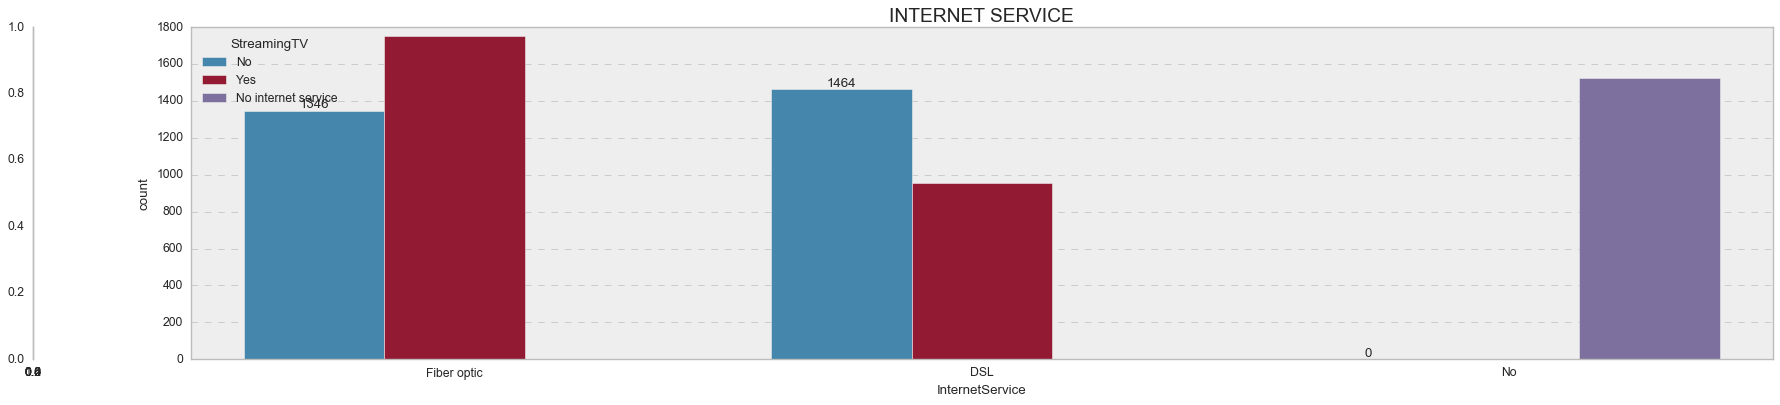

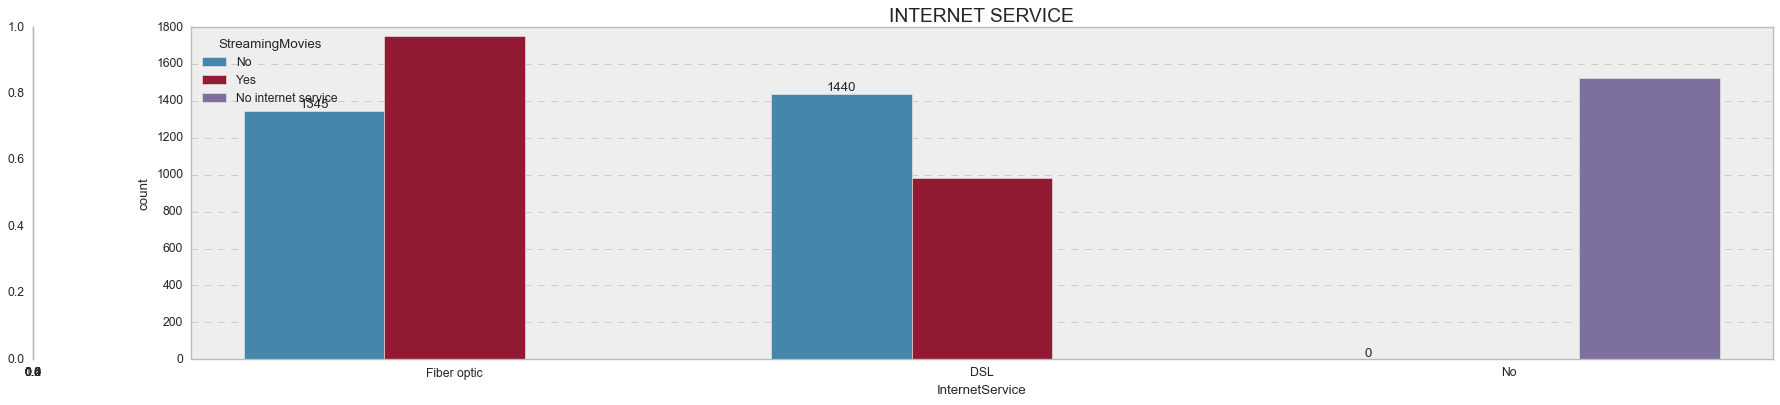

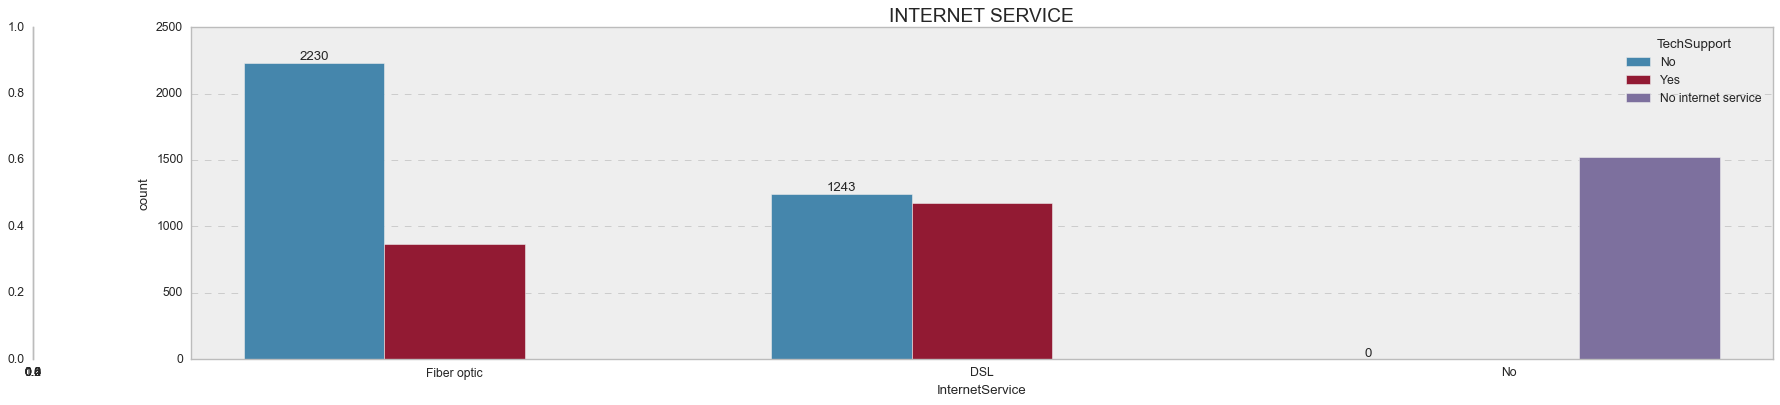

In [38]:
cols=["StreamingTV","StreamingMovies","TechSupport"]
for col in cols:
    plt.style.use('bmh')
    #sns.color_palette("blend:#7AB,#EDA", as_cmap=True)
    fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [0, 10]}, figsize=(25, 5))
    ax = sns.countplot(x = "InternetService", data = tele2, order =  tele2["InternetService"].value_counts().sort_values(ascending=False).index[0:],hue=col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
    ax.bar_label(ax.containers[0])
    plt.title(f'INTERNET SERVICE')
    plt.show()
    





In [39]:
tele2.dropna(subset=['TotalCharges'], inplace=True)
tele2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,years worked
0,7590-VHVEG,Female,Yes,Yes,No,1,No,No,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,less than a year
1,5575-GNVDE,Male,Yes,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,2.8 years
2,3668-QPYBK,Male,Yes,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,less than a year
3,7795-CFOCW,Male,Yes,No,No,45,No,No,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3.8 years
4,9237-HQITU,Female,Yes,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,less than a year


In [40]:
tele5=tele2.copy()
tele5.drop("tenure",axis=1,inplace=True)

In [41]:
tele2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'years worked'],
      dtype='object')

In [42]:
tele2.drop(["customerID","years worked"],axis=1,inplace=True)
telee=tele2.copy()

In [43]:
num_col=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod',"Churn"]

In [44]:
pd.get_dummies(tele2,num_col,drop_first=True)

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,29.85,29.85,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,34,56.95,1889.50,1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,2,53.85,108.15,1,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,45,42.30,1840.75,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2,70.70,151.65,0,1,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,1,1,1,1,1,1,0,...,1,0,1,1,0,1,0,0,1,0
7039,72,103.20,7362.90,0,1,1,1,1,1,1,...,1,0,1,1,0,1,1,0,0,0
7040,11,29.60,346.45,0,1,1,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
7041,4,74.40,306.60,1,0,1,0,1,1,1,...,0,0,0,0,0,1,0,0,1,1


In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
en=LabelEncoder()

In [47]:
for cols in num_col:
    tele2[cols]=en.fit_transform(tele2[cols])
tele2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,1,0,1,0,0,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,1,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,1,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,1,0,0,45,0,0,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,1,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [48]:
#tele2.dropna(subset=['TotalCharges'], inplace=True)

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import*
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

logistic=LogisticRegression(max_iter=100000)
tree=DecisionTreeClassifier()
forest=RandomForestClassifier()
ada=AdaBoostClassifier()
xgb=XGBClassifier()
#grid_search=GridSearchCV()
clf=MultinomialNB()
svm=SVC()
#grid_search=GridSearchCV()
gus = GaussianNB()
ben = BernoulliNB(alpha=0.1,binarize=0.1)
knn=KNeighborsClassifier(n_neighbors=5)


In [50]:
minmax=MinMaxScaler()
x=tele2.drop("Churn",axis=1)
y=tele2["Churn"]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,test_size=0.8)
x_train=minmax.fit_transform(x_train)
x_test=minmax.transform(x_test)

In [51]:
telee.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,Yes,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,Yes,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,Yes,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,Yes,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,Yes,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


https://www.kaggle.com/code/bandiatindra/telecom-churn-prediction/notebook

# NEW 

In [52]:
telee.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [53]:
columns_to_encode = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
                     'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                     'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                     'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Create dummy variables for the selected columns
df_encoded = pd.get_dummies(telee[columns_to_encode], columns=columns_to_encode)

# Concatenate the dummy variables with the 'Churn' column from the original DataFrame
df_final = pd.concat([df_encoded, telee['Churn']], axis=1)
df_final.head()

,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,tenure_1,tenure_2,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,1,0,0,1,0,1,1,0,1,0,...,1,0,0,0,1,0,0,1,0,No
1,0,1,0,1,1,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,No
2,0,1,0,1,1,0,1,0,0,1,...,1,0,0,0,1,0,0,0,1,Yes
3,0,1,0,1,1,0,1,0,0,0,...,0,1,0,1,0,1,0,0,0,No
4,1,0,0,1,1,0,1,0,0,1,...,1,0,0,0,1,0,0,1,0,Yes


In [54]:
df_final["Churn"]=df_final["Churn"].replace({
    "No":0,
    "Yes":1
})

df_final.head()

,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,tenure_1,tenure_2,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,1,0,0,1,0,1,1,0,1,0,...,1,0,0,0,1,0,0,1,0,0
1,0,1,0,1,1,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2,0,1,0,1,1,0,1,0,0,1,...,1,0,0,0,1,0,0,0,1,1
3,0,1,0,1,1,0,1,0,0,0,...,0,1,0,1,0,1,0,0,0,0
4,1,0,0,1,1,0,1,0,0,1,...,1,0,0,0,1,0,0,1,0,1


In [55]:

Y = df_final['Churn'].values
X = df_final.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=99)


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import*
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE   

logistic=LogisticRegression(max_iter=100000)
tree=DecisionTreeClassifier()
forest=RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
ada=AdaBoostClassifier()
xgb=XGBClassifier(n_estimators=100,learning_rate=0.1)
#grid_search=GridSearchCV()
clf=MultinomialNB()
svm=SVC(kernel='linear')
#grid_search=GridSearchCV()
gus = GaussianNB()
ben = BernoulliNB(alpha=0.1,binarize=0.1)
knn=KNeighborsClassifier(n_neighbors=5)





def get_score(model):
    model.fit(X_train,Y_train)
    pred=model.predict(X_test)
    accuracy=model.score(X_test,Y_test)
    return accuracy


print(f' For Logistic Regression Algorithm, we had an accuracy of {get_score(logistic)}')
print(f' For  Decision Tree Algorithm, we had an accuracy of {get_score(tree)}')
print(f' For Random Forest Algorithm, we had an accuracy of {get_score(forest)}')
print(f' For xgboost Algorithm, we had an accuracy of {get_score(xgb)}')
print(f' For AdaBoostClassifier Algorithm, we had an accuracy of {get_score(ada)}')
print(f' For SVM Algorithm, we had an accuracy of {get_score(svm)}')
print(f' For  GaussianN Algorithm, we had an accuracy of {get_score(gus)}')
print(f' For Bernoulli Algorithm, we had an accuracy of {get_score(ben)}')
print(f' For KNN Algorithm, we had an accuracy of {get_score(knn)}')


 For Logistic Regression Algorithm, we had an accuracy of 0.8159203980099502
 For  Decision Tree Algorithm, we had an accuracy of 0.7299218194740583
 For Random Forest Algorithm, we had an accuracy of 0.8052594171997157
 For xgboost Algorithm, we had an accuracy of 0.8081023454157783
 For AdaBoostClassifier Algorithm, we had an accuracy of 0.8081023454157783
 For SVM Algorithm, we had an accuracy of 0.8166311300639659
 For  GaussianN Algorithm, we had an accuracy of 0.728500355366027
 For Bernoulli Algorithm, we had an accuracy of 0.7377398720682303
 For KNN Algorithm, we had an accuracy of 0.7427149964463398


Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

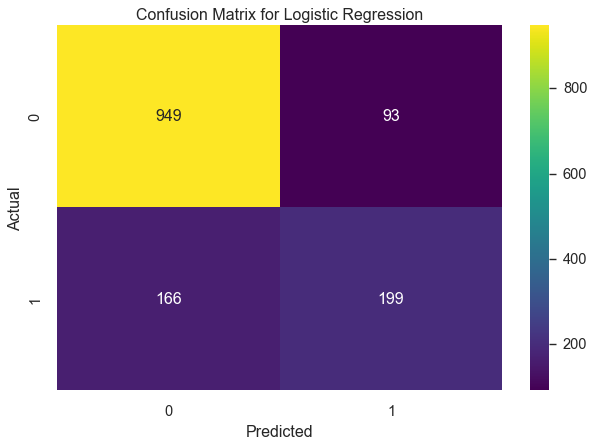

In [79]:
logistic.fit(X_train,Y_train)
pred=logistic.predict(X_test)
conf=confusion_matrix(Y_test,pred)
sns.set(font_scale=1.2)
sns.heatmap(conf, annot=True, fmt="d", cmap="viridis")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Logistic Regression")


Text(0.5, 1.0, 'Confusion Matrix for XBG classifier')

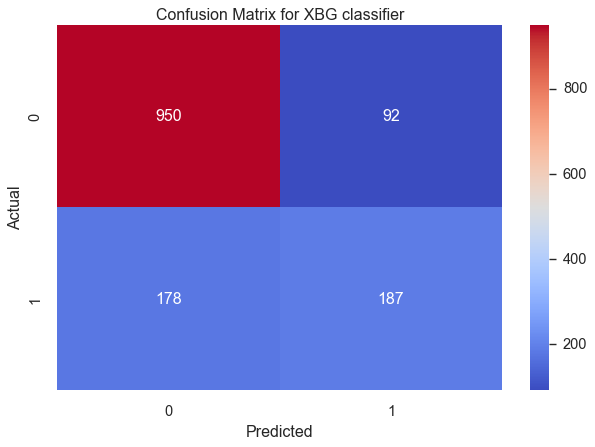

In [77]:
xgb.fit(X_train,Y_train)
pred=xgb.predict(X_test)
conf=confusion_matrix(Y_test,pred)
sns.set(font_scale=1.2)
sns.heatmap(conf, annot=True, fmt="d", cmap="coolwarm")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for XBG classifier")


Text(0.5, 1.0, 'Confusion Matrix for XBG classifier')

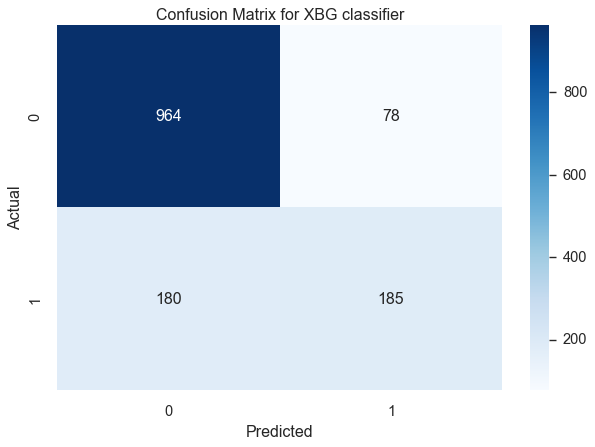

In [80]:
svm.fit(X_train,Y_train)
pred=svm.predict(X_test)
conf=confusion_matrix(Y_test,pred)
sns.set(font_scale=1.2)
sns.heatmap(conf, annot=True, fmt="d",cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for XBG classifier")
